## 단순 회귀분석
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./dataset/auto-mpg.csv')

df.head()

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
# pd.set_option('display.max_columns', 10)
# print(df.head()) 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# [Step 2] 데이터 탐색

# 데이터 자료형 확인
print(df.info())  
print()

# 데이터 통계 요약정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000  

In [2]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [3]:
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [4]:
#[Step 3] 속성(feature 또는 variable) 선택

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())  

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0    3504
1  15.0          8       165.0    3693
2  18.0          8       150.0    3436
3  16.0          8       150.0    3433
4  17.0          8       140.0    3449


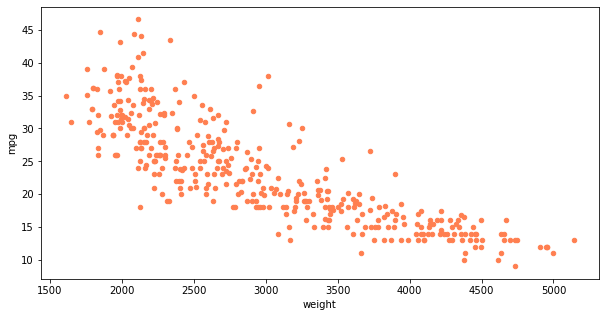

In [35]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=20, figsize=(10, 5))

plt.show()
plt.close()

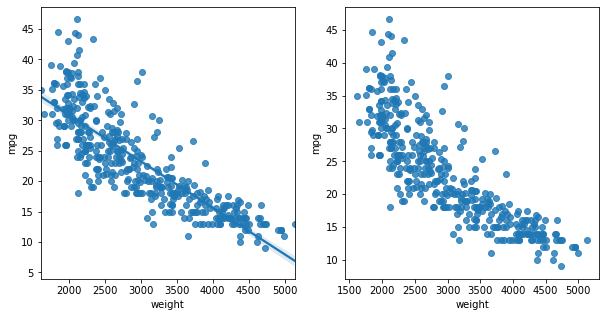

In [8]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시(기본)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

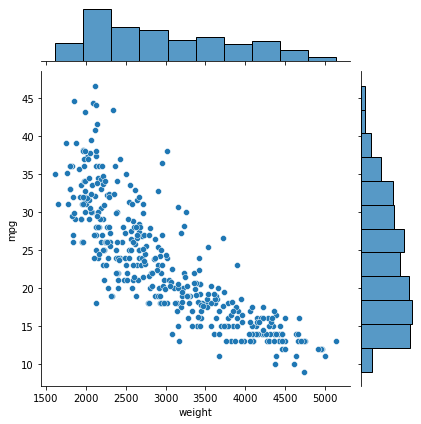

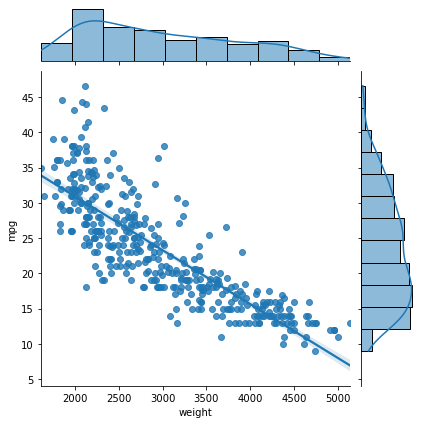

In [9]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

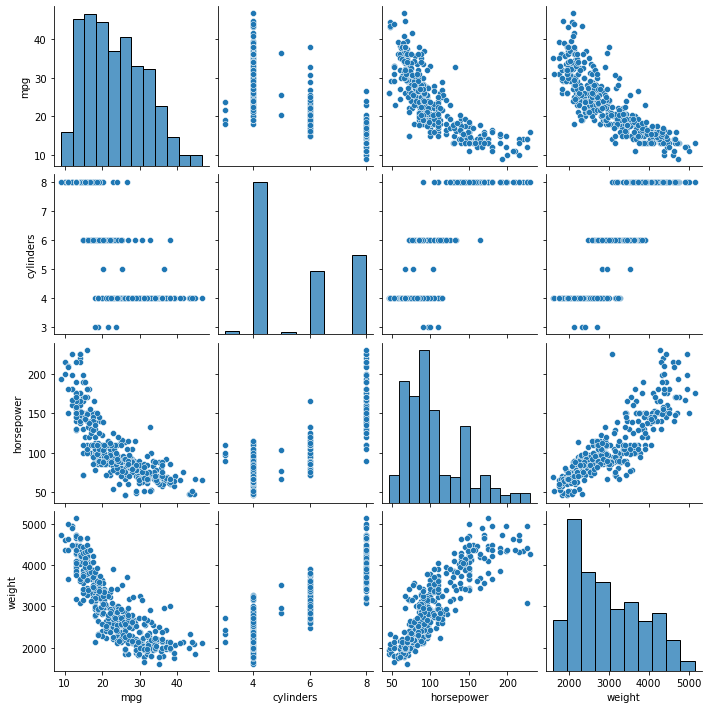

In [10]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

In [5]:
# Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print()
print('test data 개수: ', len(X_test))

train data 개수:  274

test data 개수:  118


In [6]:
# Step 5: 단순회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

In [7]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# 결정계수 값이 클수록 모형의 예측 성능이 좋다고 판단
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [8]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.990, RMSE: 4.241
Variance score: 0.682


In [9]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print()

# 회귀식의 y절편
print('y절편 b:', lr.intercept_)

기울기 a:  [-0.00775343]

y절편 b: 46.710366257280086


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

<class 'pandas.core.series.Series'>



<AxesSubplot:ylabel='Frequency'>

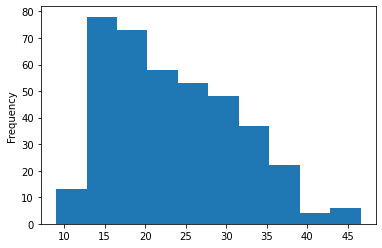

In [10]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
# y 실제 값
print(y[0:5])
print()
print(type(y))
print()
y.plot(kind='hist')

[19.54234168 18.0769431  20.06957503 20.09283533 19.96878042]
<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

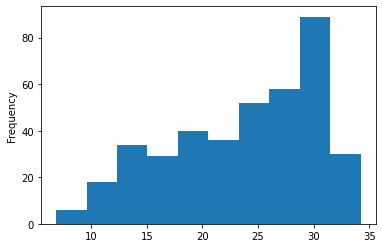

In [12]:
# y 예측 값
y_hat = lr.predict(X)
print(y_hat[0:5])
y_hat=pd.Series(y_hat)
print(type(y_hat))
y_hat.plot(kind='hist')

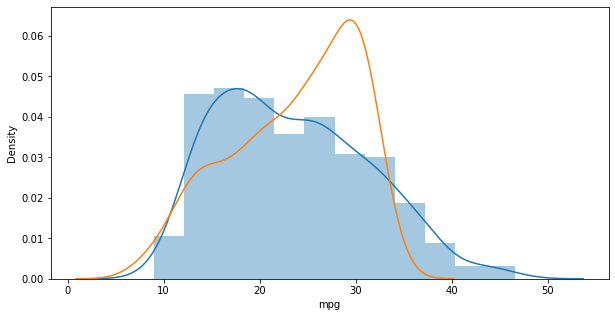

In [20]:
# 실제 값은 왼쪽으로 편향되어 있고 예측값은 반대로 오른쪽으로 편중되는 경향을 보임. 
# 모형의 오차를 줄일 필요있어 보임
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=True, label="y")
# ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
ax2 = sns.distplot(y_hat, hist=False, label="y_hat")
plt.show()
plt.close()

## 다항 회귀분석
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [21]:
df.head()
df.to_pickle('./dataset/auto-mpg.pkl')

In [22]:
import pandas as pd
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [24]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [47]:
# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape) 
print('훈련 데이터: ', y_train.shape)
print('검증 데이터: ', y_test.shape) 
X_train

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)
훈련 데이터:  (274,)
검증 데이터:  (118,)


,weight
38,4209
172,2223
277,3410
196,2164
357,2615
...,...
375,1980
322,2110
15,2833
127,2901


In [26]:
# 다항회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape) 
X_train_poly

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.5060000e+03, 6.2800360e+06],
       [1.0000000e+00, 3.5700000e+03, 1.2744900e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.9900000e+03, 8.9401000e+06],
       [1.0000000e+00, 2.0850000e+03, 4.3472250e+06],
       [1.0000000e+00, 2.8550000e+03, 8.1510250e+06],
       [1.0000000e+00, 3.2880000e+03, 1.0810944e+07],
       [1.0000000e+00, 2.1250000e+03, 4.5156250e+06],
       [1.0000000e+00, 2.2460000e+03, 5.0445160e+06],
       [1.0000000e+00, 2.395

In [72]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)


# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# 설계한 모형의 오차가 작다면 R-square가 커지고, 설계한 모형의 오차가 크다면 R-square가 작아짐

X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
y_preds = pr.predict(X_test_poly)

r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.7087009262975685


In [73]:
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 16.492, RMSE: 4.061
Variance score: 0.709


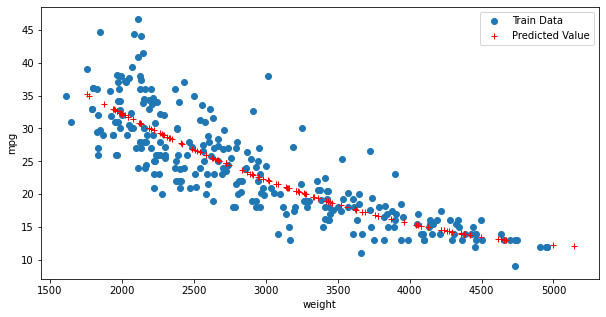

In [50]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

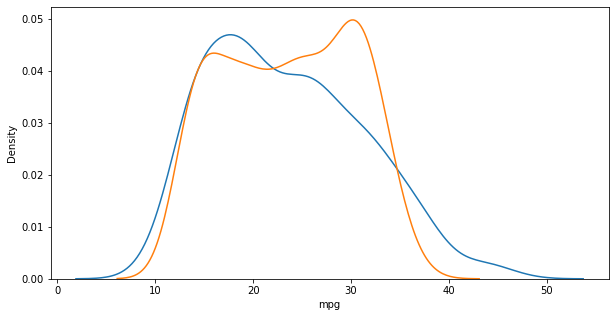

In [54]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
# 단순 회귀분석 결과와 비교하면 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 알 수 있으며 
# 더 적합한 모형임
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

## 회귀 평가 지표
* MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
* MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
* RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
* R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함. 

## 다중 회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [55]:
import pandas as pd
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [56]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   


훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [59]:
# 다중회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

In [60]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6939048496695597


In [61]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.330, RMSE: 4.163
Variance score: 0.694


In [16]:
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)
print()

# 회귀식의 y절편
print('상수항 b', lr.intercept_)

X 변수의 계수 a:  [-0.56850996 -0.0422319  -0.00507452]

상수항 b 46.28267147300791


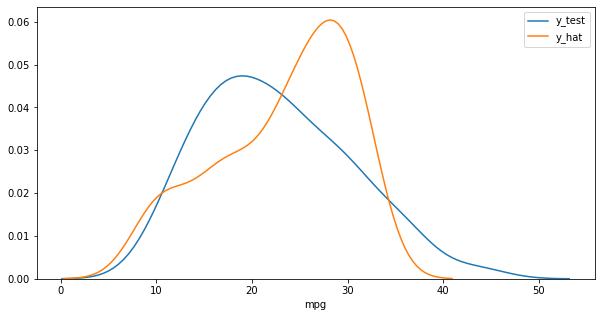

In [17]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
# 단순 회귀분석 결과와 비교시 편향되는 경향은 그대로 남아있지만 그래프의 첨도(뾰족한 정도)가 
# 약간 누그러진 것을 볼 수 있음

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat")
# ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [10]:
ndf.head()

,mpg,cylinders,horsepower,weight
0,15.0,8,165.0,3693.0
1,18.0,8,150.0,3436.0
2,16.0,8,150.0,3433.0
3,17.0,8,140.0,3449.0
4,15.0,8,198.0,4341.0


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(ndf)
ndf_ms = scaler.transform(ndf)
ndf_ms_df = pd.DataFrame(data=ndf_ms, columns=ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.159574,1.0,0.646739,0.589736
1,0.239362,1.0,0.565217,0.516870
2,0.186170,1.0,0.565217,0.516019
3,0.212766,1.0,0.510870,0.520556
4,0.159574,1.0,0.826087,0.773462


In [19]:
# 속성(변수) 선택
X=ndf_ms_df[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf_ms_df['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape) 

# 다중회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

훈련 데이터:  (273, 3)
검증 데이터:  (118, 3)
0.7187012273294775


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 0.012, RMSE: 0.108
Variance score: 0.719


In [74]:
# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ndf)
ndf_ss = scaler.transform(ndf)
ndf_ss_df = pd.DataFrame(data=ndf_ss, columns=ndf.columns)
ndf_ss_df.head()

,mpg,cylinders,horsepower,weight
0,-0.698638,1.483947,0.664133,0.620540
1,-1.083498,1.483947,1.574594,0.843334
2,-0.698638,1.483947,1.184397,0.540382
3,-0.955212,1.483947,1.184397,0.536845
4,-0.826925,1.483947,0.924265,0.555706


In [75]:
# 속성(변수) 선택
X=ndf_ss_df[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf_ss_df['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape) 

# 다중회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)
0.6939048496695599


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 0.285, RMSE: 0.534
Variance score: 0.694


<AxesSubplot:title={'center':'mpg Histogram'}, xlabel='mpg', ylabel='Density'>

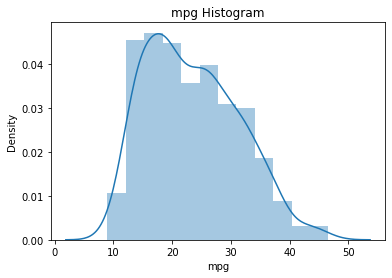

In [77]:
# 회귀 모델을 적용하기 전에 타깃 값의 분포도가 정규 분포인지 확인
plt.title('mpg Histogram')
sns.distplot(ndf['mpg'])

<AxesSubplot:title={'center':'Standard Transformed npg Histogram'}, ylabel='Density'>

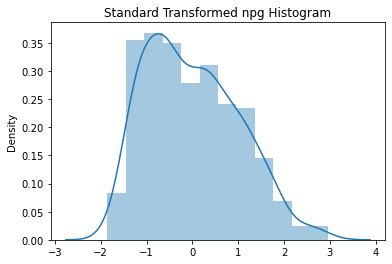

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ndf[['mpg']])
scaled_data = scaler.transform(ndf[['mpg']])
scaled_data_df = pd.DataFrame(data=scaled_data)

plt.title('Standard Transformed npg Histogram')
sns.distplot(scaled_data_df)

<AxesSubplot:title={'center':'Log Transformed mpg Histogram'}, xlabel='mpg', ylabel='Density'>

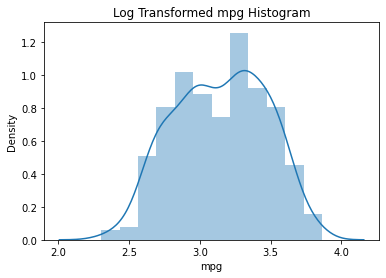

In [79]:
# 결과값을 넘파이의 log1p()를 이용해 로그 변환한 결과값을 기반으로 학습한 뒤 예측시에는 
# 다시 결과값을  expm1()으로 추후 환원
plt.title('Log Transformed mpg Histogram')
log_mpg = np.log1p(ndf['mpg'])
sns.distplot(log_mpg)